In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ROI as ROI

## Single Particle Statistics

In [2]:
filePath = '/Users/yungkuo/Google Drive/'#'G:/Google Drive/' #'/Users/yungkuo/Google Drive/'

In [3]:
folders = ['100316 QCSE rQD PVP', 
           '100416 QCSE 40nmNR PVP',
           '100416 QCSE 40nmNR Te PVP', 
           '093016 QCSE kQD PVP',
           '020217 QCSE sandwich',
           '020717 QCSE sandwich',
           '020717 QCSE sandwich Mn',
           '021317 QCSE type-II NR']

In [4]:
dL = pd.DataFrame()
for folder in folders:
    for f in ROI.listdir(filePath+folder+'/results/', '', '.csv'):
        dL1 = pd.read_csv(filePath+folder+'/results/'+ f, index_col=0)
        dL1['NR'] = f.split('_')[0]
        dL = dL.append(dL1)
    print(f)

rQD_PVP_OD0.5OD0.5_76V_8Hz_9_result.csv
40nmNR_PVP_OD0.5OD0.5_74V_8Hz_31_result.csv
40nmNRTe_PVP_OD0.5OD0.5_74V_8Hz_9_result.csv
kQD_PVP_OD0.5OD0.5_73V_8Hz_7_result.csv
1296BZn_PVP_OD0.4_78V_8Hz_8_result.csv
9BZn_PVP_OD0.6_73V_8Hz_9_result.csv
Mn doped_PVP_OD0.6_73V_8Hz_9_result.csv
1296BZn_PVP_OD0.6_70V_8Hz_9_result.csv


In [5]:
dL[:5]

,Loff,Loff_COM,Lon,Lon_COM,dE (meV),dE_COM (meV),dF/F,dL,dL_COM,NR
0,616.796287,615.125987,618.244762,617.787331,-4.710103,-8.683997,-0.121324,1.448475,2.661344,rQD
1,614.551288,616.033415,615.969115,616.381944,-4.644382,-1.138169,-0.004323,1.417827,0.348529,rQD
2,613.403129,613.293636,614.810605,613.190007,-4.627808,0.341696,-0.006289,1.407476,-0.103629,rQD
3,540.210908,544.573156,544.008631,546.227136,-16.024182,-6.894810,-0.000155,3.797723,1.653979,rQD
5,588.727757,596.005347,589.918798,596.095627,-4.252474,-0.315097,0.031581,1.191041,0.090279,rQD


In [6]:
for i in dL:
    print(i)

Loff
Loff_COM
Lon
Lon_COM
dE (meV)
dE_COM (meV)
dF/F
dL
dL_COM
NR


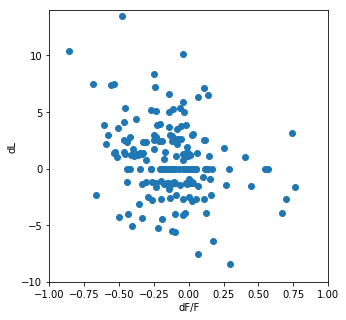

In [7]:
NPname = '1296BZn'
#dL[dL['NR']=='kQD'].plot.scatter('Loff', 'Lon')
plt.figure(figsize=(5,5))
plt.plot(dL[dL['NR']==NPname]['dF/F'], dL[dL['NR']==NPname]['dL'],'o')
plt.ylim(-10,14)
plt.xlim(-1,1)
plt.xlabel('dF/F')
plt.ylabel('dL')
#dL.plot.scatter('Loff', 'dL')

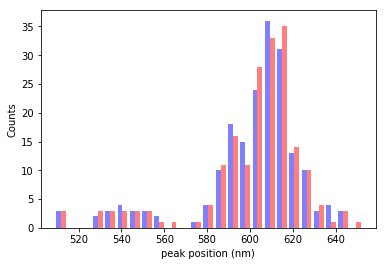

In [8]:
#plt.hist(dL[dL['NR']=='1296BZn']['Loff'], bins=25, alpha=0.5)
#plt.hist(dL[dL['NR']=='1296BZn']['Lon'], bins=25, alpha=0.5)

plt.hist([dL[dL['NR']=='1296BZn']['Loff_COM'], dL[dL['NR']=='1296BZn']['Lon_COM']], 
         bins=25, alpha=0.5, color=['b', 'r'])
plt.xlabel('peak position (nm)')
plt.ylabel('Counts')
#plt.hist(dL[dL['NR']=='1296BZn']['Lon_COM'], bins=25, alpha=0.5, color='r')

# For Violin Plots

In [9]:
import seaborn as sns
sns.set_style("whitegrid")

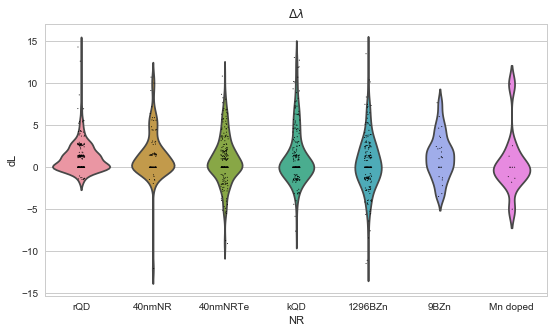

In [10]:
dL_clipped = dL[np.logical_and(dL['dL']<15, dL['dL']>(-15))]
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.violinplot(x='NR', y='dL', data=dL_clipped, bw=0.3, inner=None)
ax = sns.stripplot(x='NR', y='dL', data=dL_clipped, color='black', size=1, jitter=0.05)
ax.set_title('$\Delta \lambda$')

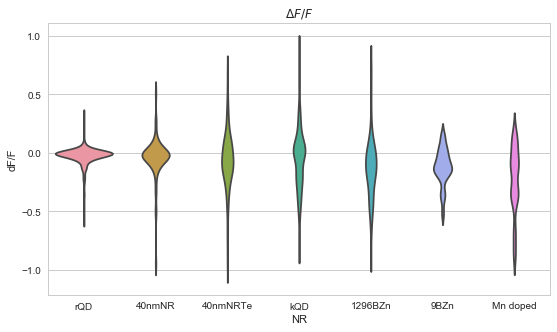

In [11]:
dL_clipped = dL[np.logical_and(dL['dF/F']<1, dL['dF/F']>(-1))]
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.violinplot(x='NR', y='dF/F', data=dL_clipped, bw=0.3, inner=None)
#ax = sns.stripplot(x='NR', y='dL', data=dL_clipped, color='black', size=0.5, jitter=0.02)
ax.set_title('$\Delta F/F$')

# For interactive plots

In [12]:
def plot_normed_hist(n, bins, ax, color='b', label='', fillcolor='', alpha=1):
    x = bins.repeat(2)
    y = np.insert(np.append((n.repeat(2)/np.sum(n, dtype='float')), 0), 0, 0)
    L = [ax.plot(x, y, color=color, label=label), ax.fill_between(x, y, 0, facecolor=fillcolor, alpha=alpha)]
    return L

In [13]:
import matplotlib
cmap = matplotlib.cm.Vega10

In [14]:
from ipywidgets import widgets, Checkbox, interactive
from IPython.display import display

In [15]:
Datasets = dL
label = np.unique(dL['NR'])
bins = [40,100,50,40]#[np.arange(-7,15,1), np.arange(-7,15,1), np.arange(-0.9,1.0,0.1), np.arange(-40,20,3)]

def updatePlot(**kwargs):
    fig, ax = plt.subplots(2,2, figsize=(10,6))
    ax = ax.ravel()
    NData = float(len(label))  
    for a, (l, v) in enumerate(kwargs.items()):
        if v == True: 
            n, bins[0] = np.histogram(np.array(dL[dL['NR']==l]['dL']), bins=bins[0])
            plot_normed_hist(n, bins[0], ax[0], color=cmap(a/NData), label=l, fillcolor=cmap(a/NData), alpha=0.1)
            n, bins[1] = np.histogram(np.array(dL[dL['NR']==l]['dL_COM']), bins=bins[0])
            plot_normed_hist(n, bins[1], ax[1], color=cmap(a/NData), label=l, fillcolor=cmap(a/NData), alpha=0.1)
            n, bins[2] = np.histogram(np.array(dL[dL['NR']==l]['dF/F']), bins=bins[2])
            plot_normed_hist(n, bins[2], ax[2], color=cmap(a/NData), label=l, fillcolor=cmap(a/NData), alpha=0.1)
            n, bins[3] = np.histogram(np.array(dL[dL['NR']==l]['dE (meV)']), bins=bins[3])
            plot_normed_hist(n, bins[3], ax[3], color=cmap(a/NData), label=l, fillcolor=cmap(a/NData), alpha=0.1)
            ax[1].annotate(l + '_n = %d' % float(dL[dL['NR']==l].shape[0]), xytext=(1.2, 0.8-float(a)/10.), 
                           textcoords='axes fraction', xy=(0.2, 0.2), xycoords='data')
            
    for i, title in enumerate(['dL','dL_COM','dF/F','dE (meV)']):
        ax[i].set_title(title)
        ax[i].legend(frameon=False)
    ax[0].set_xlim(-7,15)
    ax[1].set_xlim(-7,15)
    ax[2].set_xlim(-0.9,1)
    ax[3].set_xlim(-40,20)
    plt.subplots_adjust(hspace = 0.2) 

In [16]:
chk = [Checkbox(description=l) for l in label]
w = interactive(updatePlot, **{c.description: c.value for c in chk})

box_layout = widgets.Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='',
                    width='auto')

box = widgets.HBox(children=w.children, layout=box_layout)
box

# For Proceedings of SPIE paper

In [17]:
def plot_normed_hist(n, bins, ax, color='b', label='', fillcolor='', alpha=1):
    x = bins.repeat(2)
    y = np.insert(np.append((n.repeat(2)/np.sum(n, dtype='float')), 0), 0, 0)
    L = [ax.plot(x, y, color=color, label=label), ax.fill_between(x, y, 0, facecolor=fillcolor, alpha=alpha)]
    return L

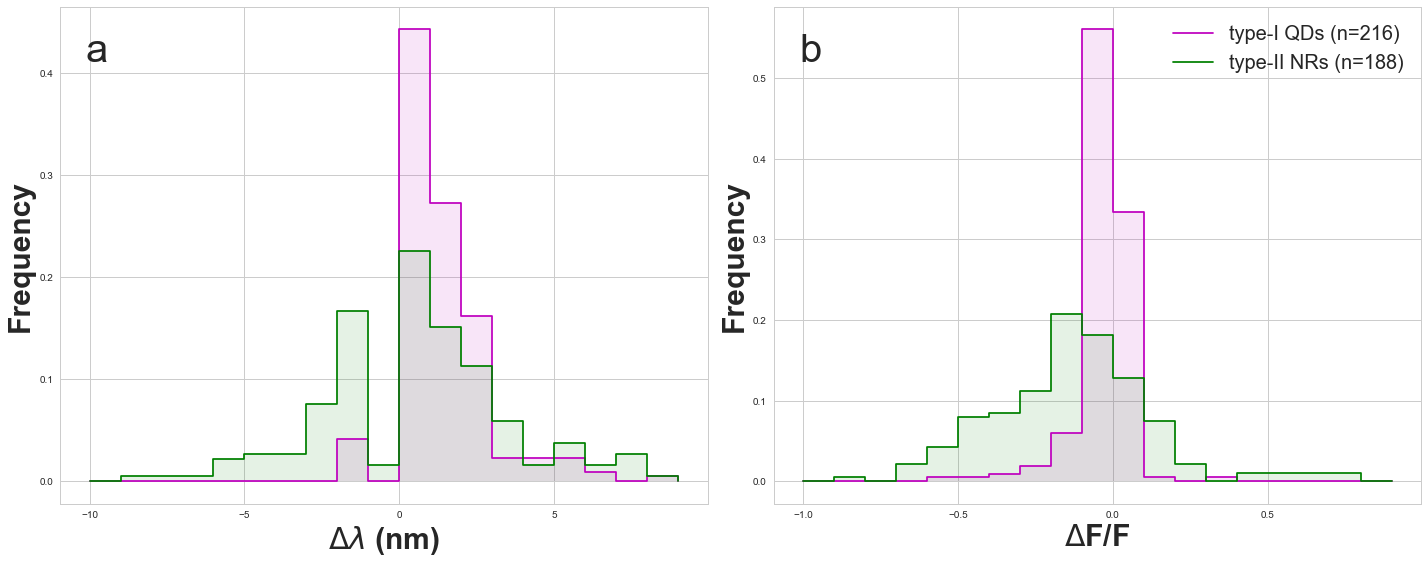

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

bins = np.arange(-10,10,1)
n, b = np.histogram(np.array(dL[dL['NR']=='rQD']['dL']), bins=bins)
plot_normed_hist(n, bins, ax[0], color='m', label='type-I QDs (n=%d)'% n.sum(), fillcolor='m', alpha=0.1)
n, b = np.histogram(np.array(dL[dL['NR']=='1296BZn']['dL']), bins=bins)
plot_normed_hist(n, bins, ax[0], color='g', label='type-II NRs (n=%d)'% n.sum(), fillcolor='g', alpha=0.1)
ax[0].set_xlabel('$\Delta$$\lambda$ (nm)', fontsize=30, weight='bold')
ax[0].set_ylabel('Frequency', fontsize=30, weight='bold')

bins = np.arange(-1,1,0.1)
n, b = np.histogram(np.array(dL[dL['NR']=='rQD']['dF/F']), bins=bins)
plot_normed_hist(n, bins, ax[1], color='m', label='type-I QDs (n=%d)'% n.sum(), fillcolor='m', alpha=0.1)
n, b = np.histogram(np.array(dL[dL['NR']=='1296BZn']['dF/F']), bins=bins)
plot_normed_hist(n, bins, ax[1], color='g', label='type-II NRs (n=%d)'% n.sum(), fillcolor='g', alpha=0.1)
ax[1].set_xlabel('$\Delta$F/F', fontsize=30, weight='bold')
ax[1].set_ylabel('Frequency', fontsize=30, weight='bold')
ax[1].legend(fontsize=20, frameon=False)
ax[0].annotate('a', xy=(0,0), xytext=(0.04,0.89), xycoords='axes fraction', fontsize=40)
ax[1].annotate('b', xy=(0,0), xytext=(0.04,0.89), xycoords='axes fraction', fontsize=40)



fig.tight_layout()

# For QCSE paper

In [19]:
import seaborn as sns
sns.set_style("white")
sns.set_palette('hls')

In [20]:
label = ['6 nm type-I \nCdSe/ZnS QDs', 
         '40 nm quasi-type-I \nCdSe/CdS NRs', 
         '40 nm quasi-type-I \nCdSe(Te)/CdS NRs', 
         '12 nm quasi-type-I \nCdS/CdSe/CdS QDs', 
         '12 nm type-II \nZnSe/CdS NRs']

NPname = ['rQD',  
          '40nmNR', 
          '40nmNRTe', 
          'kQD',
          '1296BZn']

color = ['r','y','g','c','b']

In [21]:
dL_clipped = dL[np.logical_and(dL['dL']<15, dL['dL']>(-15))]
dL_clipped = dL_clipped[np.logical_and(dL_clipped['dF/F']<2, dL_clipped['dF/F']>(-2))]

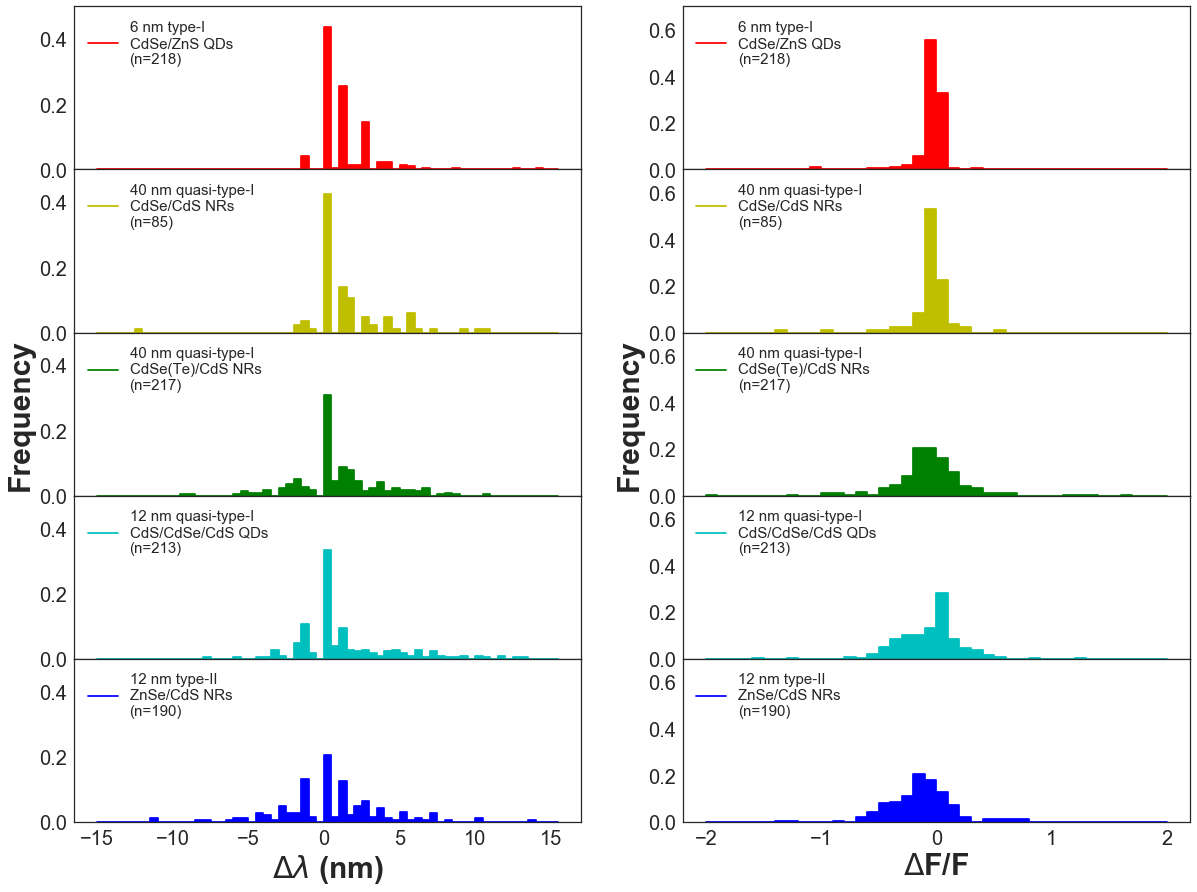

In [24]:
fig, ax = plt.subplots(5,2, figsize=(20,15), sharex=False)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

bins = np.arange(-15,16,0.5)
for i in range(5):
    n, b = np.histogram(np.array(dL_clipped[dL_clipped['NR']== NPname[i]]['dL']), bins=bins)
    plot_normed_hist(n, bins, ax[i,0], color=color[i], label=label[i]+' \n(n=%d)'% n.sum(), fillcolor=color[i], alpha=1)
    ax[i,0].set_ylim(0,0.5)
bins = np.arange(-2,2.1,0.1)
for i in range(5):    
    n, b = np.histogram(np.array(dL_clipped[dL_clipped['NR']== NPname[i]]['dF/F']), bins=bins)
    plot_normed_hist(n, bins, ax[i,1], color=color[i], label=label[i]+'\n(n=%d)'% n.sum(), fillcolor=color[i], alpha=1)
    ax[i,1].set_ylim(0,0.7)


ax[4,0].set_xlabel('$\Delta$$\lambda$ (nm)', fontsize=30, weight='bold')
ax[2,0].set_ylabel('Frequency', fontsize=30, weight='bold')
ax[4,1].set_xlabel('$\Delta$F/F', fontsize=30, weight='bold')
ax[2,1].set_ylabel('Frequency', fontsize=30, weight='bold')
for a in fig.axes:
    a.legend(fontsize=15, loc=2)

fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.setp(ax[4,0].get_xticklabels(), visible=True)
plt.close(fig)
display(fig)

In [51]:
fig.axes